## Import Libraries

In [12]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Define the main function

In [15]:
def main(num_topics_range):
    # Read the CSV file
    npr = pd.read_csv('./Files/npr.csv')

    # Extract the text column
    text_column = npr['Article']  # Replace 'text_column_name' with the actual column name

    # Preprocess the text
    def preprocess_text(text):
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in text.lower().split() if word not in stop_words]
        return tokens

    tokenized_documents = [preprocess_text(text) for text in text_column]

    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_documents)

    # Convert the tokenized documents into a bag-of-words corpus
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

    coherence_scores = []

    for num_topics in num_topics_range:
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
        coherence_model = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((num_topics, coherence_score))

        print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    # Plot coherence scores
    num_topics, scores = zip(*coherence_scores)
    plt.plot(num_topics, scores)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score for Different Numbers of Topics")
    plt.show()

## Function Execution

Number of Topics: 2, Coherence Score: 0.2304


Number of Topics: 3, Coherence Score: 0.2880


Number of Topics: 4, Coherence Score: 0.3173


Number of Topics: 5, Coherence Score: 0.2814
Number of Topics: 6, Coherence Score: 0.3472


Number of Topics: 7, Coherence Score: 0.3143


Number of Topics: 8, Coherence Score: 0.3064


Number of Topics: 9, Coherence Score: 0.3185


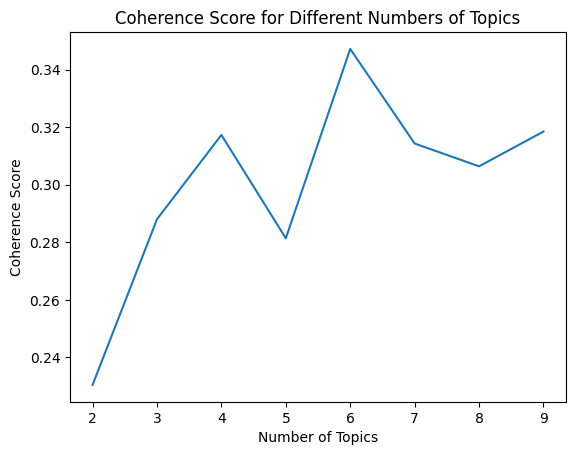

In [16]:
if __name__ == '__main__':
    num_topics_range = range(2, 10)
    main(num_topics_range)